<a href="https://colab.research.google.com/github/klklgooa/MachineLearning/blob/main/6_3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석

특성이 많으면 선형모델 성능 높아짐
과대적합됨, 저장 공간이 부족, 모델 처리속도 느려짐

차원 축소는 데이터를 가장 잘 나타내는 일부 특성만 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킴

줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있음

주성분 분석(PCA principal component analysis)
대표적인 차원 축소 알고리즘

데이터에 있는 분산이 큰 방향을 찾음
분산은 데이터가 널리 퍼져있는 정도.

분산이 큰 방향이란, 데이터를잘 표현하는 어떤 벡터.

하나의 벡터로 표현하면 특성1개.
특성의 갯수만큼 벡터를 찾을 수 있지만 원래특성의 갯수보다 적게 찾음. (주성분 적게. 차원축소.)

샘플 100개 주성분 변환해도 샘플은 그대로, 차원만 바뀜. > 손실발생.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/6-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## PCA 클래스

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-10-30 01:42:20--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-10-30 01:42:20--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-10-30 01:42:20--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100) #2차원배열.(그림을 1차원으로.)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50) #주성분의 갯수 50개로 지정. 10000개 > 50개.
pca.fit(fruits_2d)

PCA(n_components=50)

첫번째 차원은 50. 50개의 주성분.
두번째 차원은 항상 원본 데이터의 특성 개수와 같으므로 10000
주성분 벡터의 크기는 원본 데이터와 동일함.

In [ ]:
print(pca.components_.shape) #300,100*100 > 10000개의 차원중 50개의 주성분 벡터로 구성.

(50, 10000)


In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1): #주성분을 이미지처럼 출력
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

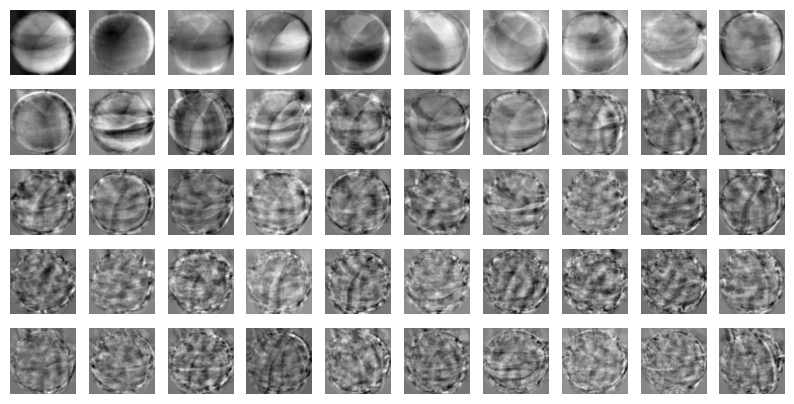

In [ ]:
draw_fruits(pca.components_.reshape(-1, 100, 100)) #분산의 큰 순서(주성분벡터)로 그림 출력

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d) #10000개의 특성을 앞서 찾은 주성분 50개로 변환.

In [ ]:
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca) #원본으로 돌림. //축소하고 복구하여 손실발생
print(fruits_inverse.shape)

(300, 10000)


In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

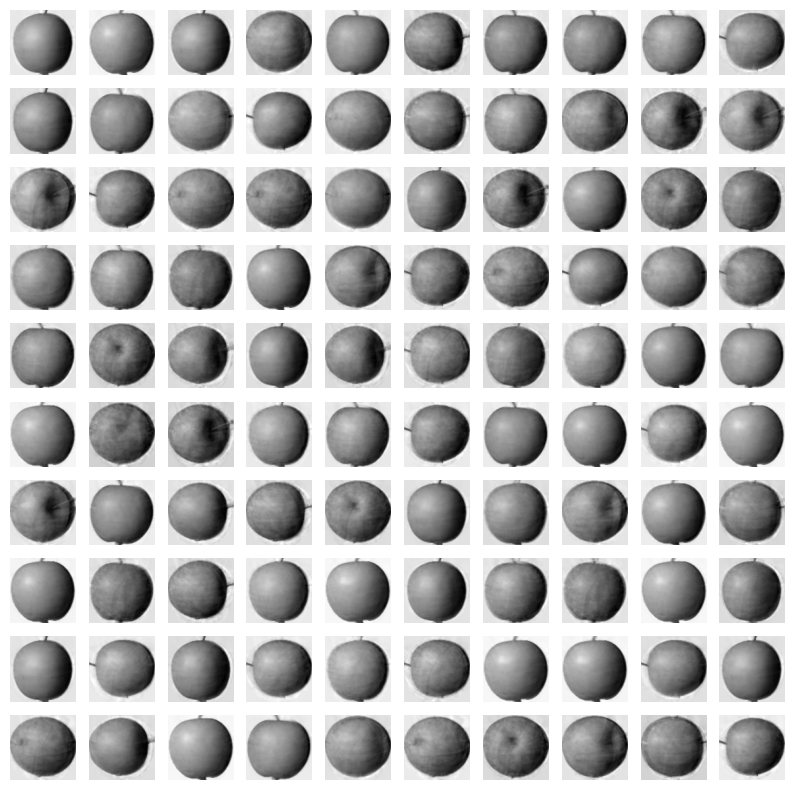

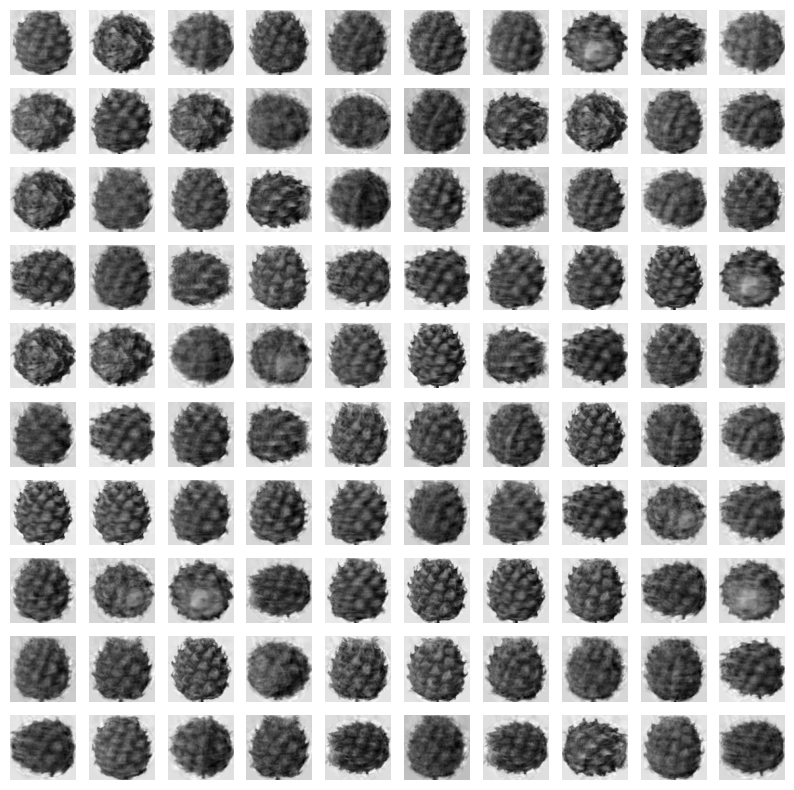

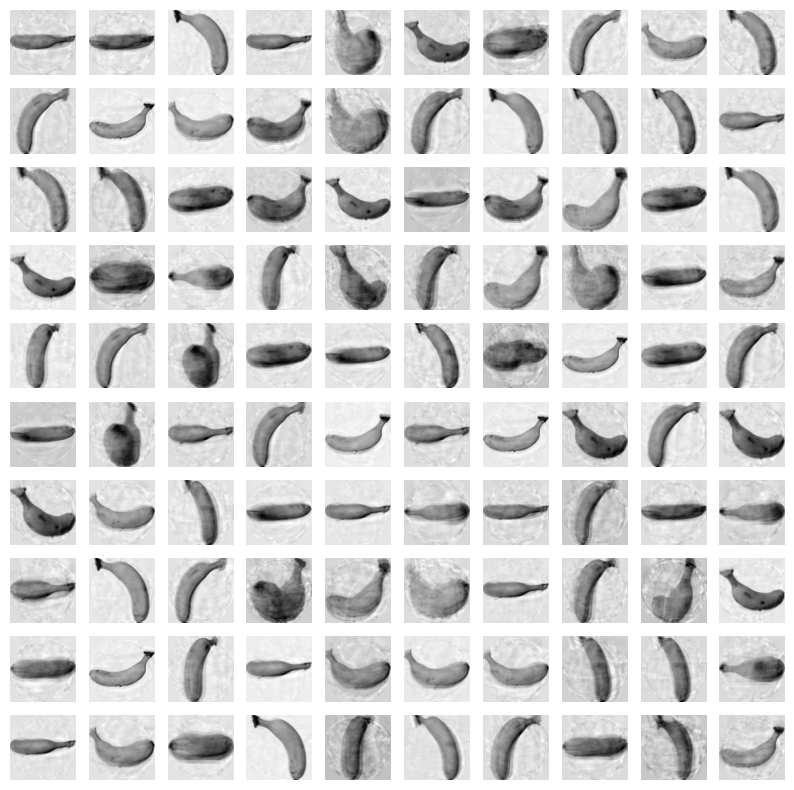

In [ ]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산

In [ ]:
print(np.sum(pca.explained_variance_ratio_)) #92%의 주성분의 갯수를 찾음

0.9215395172133755


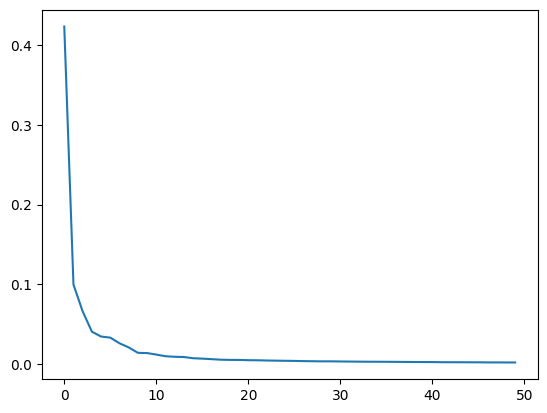

In [ ]:
plt.plot(pca.explained_variance_ratio_)

처음 10개의 주성분이 대부분의 분산을 표현하고 있음

## 다른 알고리즘과 함께 사용하기

과일 사진 원본 데이터와 PCA로축소한 데이터를 지도 학습에 적용하고 차이를 찾아보자

3개의 고아ㅣㄹ 사진을 분류해야 하므로 로지스틱 회귀 모델을 사용해봄

지도 학습 모델이므로 타깃값을 설정

사과 0 파인애플 1 바나나 2

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target) #모델, 데이터, 타깃값
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
2.519768810272217


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time'])) #PCA 를 이용하여 차원 축소를 하면 저장 공간, 훈련속도에서 이점.

0.9933333333333334
0.03291983604431152


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

2
0.5229877245800599


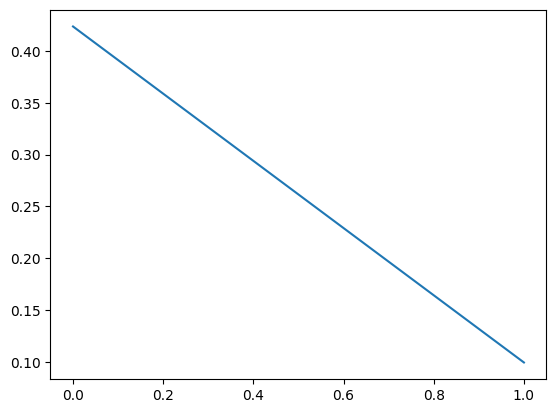

In [ ]:
pca = PCA(n_components=0.5) #50%에 해당되는 주성분을 찾아라. 0.4는 주성분 벡터 1개.
pca.fit(fruits_2d)
print(pca.n_components_)
print(np.sum(pca.explained_variance_ratio_)) #찾은 주성분의 갯수% 로 출력
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
print(pca.n_components_) #2개의 주성분 찾음.

2


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))#2개의 특성만으로 99%의 정확도 달성.

0.9933333333333334
0.034775400161743165


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# **차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아보자**

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
print(np.unique(km.labels_, return_counts=True)) #원본데이터는 112, 98, 90 개로 각각 과일 분류

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


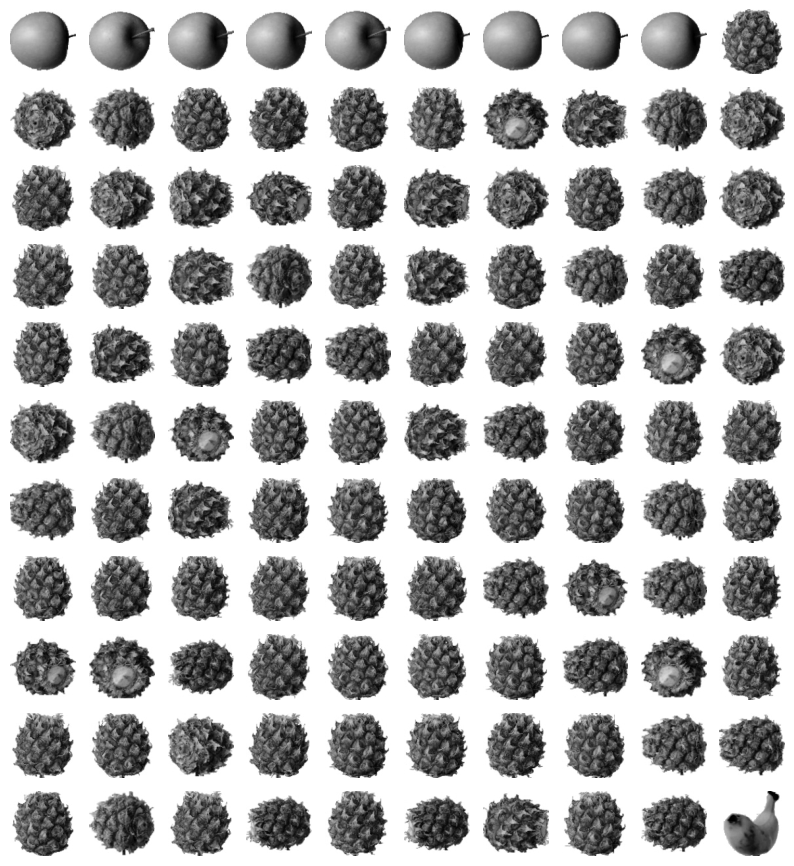

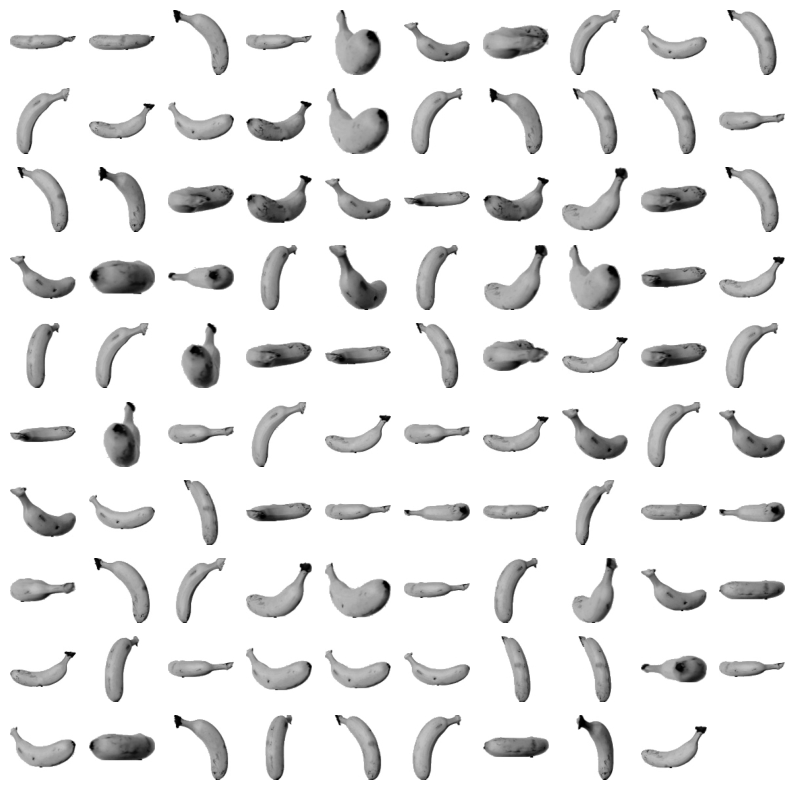

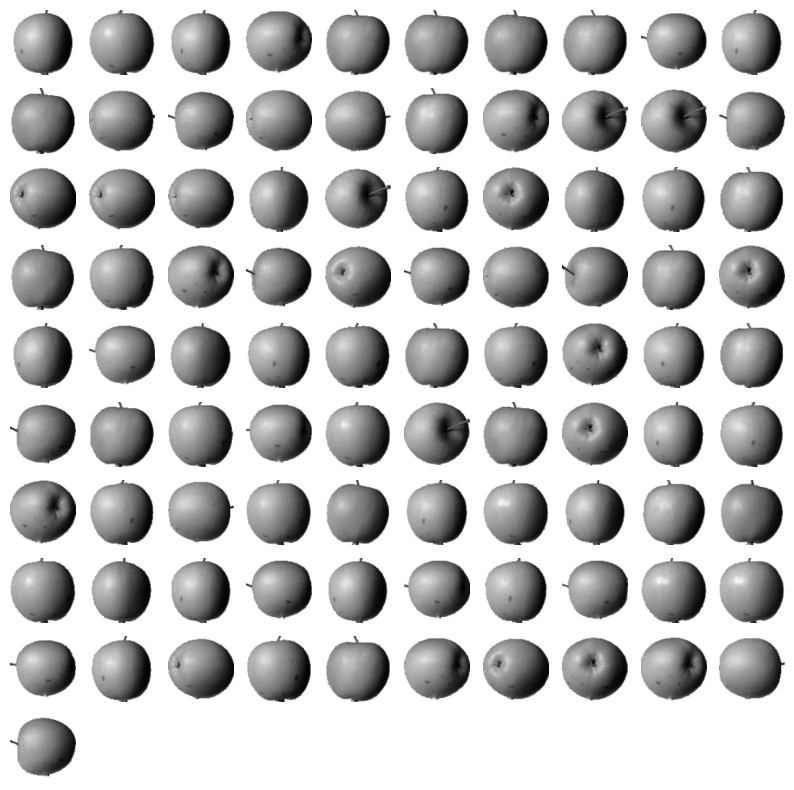

In [ ]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

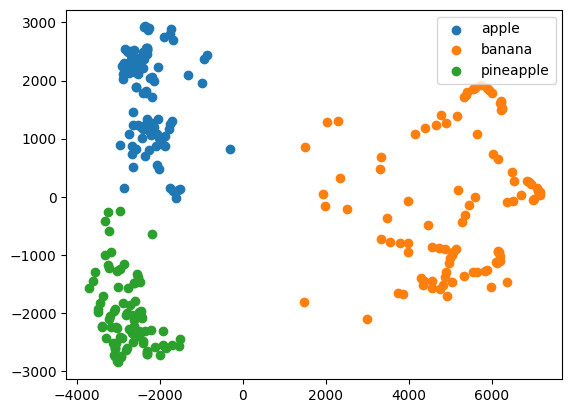

In [ ]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

In [ ]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

차원축소 장점.

과대적합 억제

저장 공간 확보

모델 처리속도 상승

모델 성능 상승

시각화 가능